In this tutorial we go over the first lab and make a very brief intro to filtering.

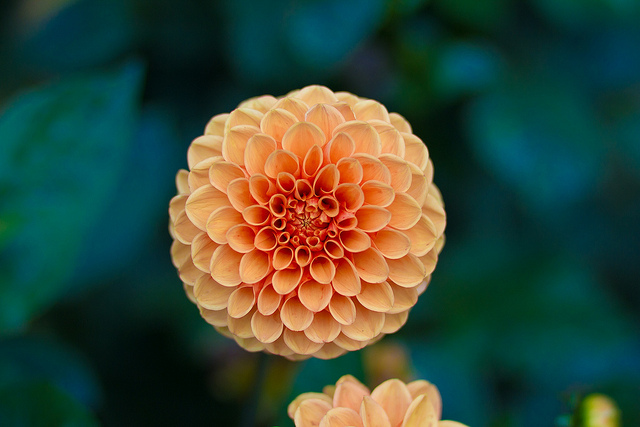

In [56]:
from sklearn.datasets import load_sample_image
from google.colab.patches import cv2_imshow

import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img_rgb = load_sample_image('flower.jpg')
img_bgr = np.flip(img_rgb, axis=-1)
cv2_imshow(img_bgr)

In [57]:
tuple_bgr = cv.split(img_bgr)

histSize = 256    # number of bins
histRange = (0, 256)

b_hist = cv.calcHist(tuple_bgr, [0], None, [histSize], histRange, accumulate=False)
g_hist = cv.calcHist(tuple_bgr, [1], None, [histSize], histRange, accumulate=False)
r_hist = cv.calcHist(tuple_bgr, [2], None, [histSize], histRange, accumulate=False)

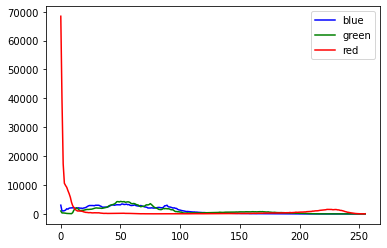

In [58]:
plt.plot(b_hist, label = 'blue', color = 'blue')
plt.plot(g_hist, label = 'green', color = 'green')
plt.plot(r_hist, label = 'red', color = 'red')

plt.legend()
plt.show()

<class 'numpy.ndarray'>


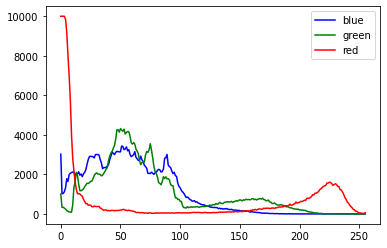

In [59]:
print(type(r_hist))

r_hist[r_hist>10000] = 10000

plt.plot(b_hist, label = 'blue', color = 'blue')
plt.plot(g_hist, label = 'green', color = 'green')
plt.plot(r_hist, label = 'red', color = 'red')
plt.legend()
plt.show()

In [ ]:
def ConvertToSingleChannel(img, idx):
  new = np.zeros_like(img)
  new[:,:,idx] = img[:,:,idx]
  return new

img_onlyR = ConvertToSingleChannel(img_bgr, 2)
img_onlyB = ConvertToSingleChannel(img_bgr, 0)
img_onlyG = ConvertToSingleChannel(img_bgr, 1)

cv2_imshow(img_onlyB)
cv2_imshow(img_onlyG)
cv2_imshow(img_onlyR)

In [ ]:
img_onlyR[img_onlyR<100] = 0    # Setting a threshold to segment the flower

cv2_imshow(img_onlyR)

np.where(img_onlyR[:,:,2])

In [ ]:
zero_idx = np.where(img_onlyR[:,:,2] == 0)    # Returns the indices of zero values

In [ ]:
# Combining RGB channels for the Red flower

img_onlyB[zero_idx[0], zero_idx[1], 0] = 0   # Makes the same indices zero in B channel
img_onlyG[zero_idx[0], zero_idx[1], 1] = 0

img_segmented_BGR = img_onlyR+img_onlyB+img_onlyG   # Since they all have one different non-zero channel, we can add them together.
cv2_imshow(img_segmented_BGR)

In [ ]:
img_gray = cv.cvtColor(img_segmented_BGR, cv.COLOR_BGR2GRAY)
_, img_thresh = cv.threshold(img_gray, 30, 255, 0)    # (Source image, threshold, mapped value (if >threshold), threshold_mode)
cv2_imshow(img_thresh)

In [ ]:
contours, hierarchy = cv.findContours(img_thresh, cv.RETR_TREE, cv.CHAIN_APPROX_NONE )   # Automatically locates contours - an outline or a bounding shape

In [ ]:
canvas = np.zeros(img_segmented_BGR.shape)
cv.drawContours(canvas, contours, -1, (0,255,0), 1)   # -1 to draw all contours
cv2_imshow(canvas)

In [ ]:
# How to locate the contour around the flower?

# We will use 'hierarchy'
# [Next, Previous, First_Child, Parent]
# https://docs.opencv.org/4.x/d9/d8b/tutorial_py_contours_hierarchy.html

# If Parent = -1, it is the top of the hierarchy. If Child = -1, it is the bottom of the hierarchy.
# Next and Previous refer to the other contours on the same hierarchical level
print(hierarchy.shape)
hierarchy = np.squeeze(hierarchy)
print(hierarchy)



In [ ]:
top = hierarchy[hierarchy[:,3] == -1]
print(top)

In [ ]:
hierarchy[7,:]    # How do we know? It has many children

mask = np.zeros(img_gray.shape, np.uint8)
cv.drawContours(mask, contours[7], -1, (255,255,255),1)
cv2_imshow(mask)

In [ ]:
# Get the area inside

area_inside = np.empty(img_gray.shape, dtype=np.int8)
for i in range(img_gray.shape[0]):
    for j in range(img_gray.shape[1]):
        area_inside[i,j] = cv.pointPolygonTest(contours[7], (j,i), measureDist=False)      # Determines whether the point is inside a contour, outside, or lies on an edge

area_inside[area_inside == -1] = 0    # Get rid of -1 values
gray_inside = area_inside * 255

In [ ]:
x,y = np.where(area_inside == 0)
img_segmented_BGR[x,y,:] = 0
cv2_imshow(img_segmented_BGR)

In [ ]:
# HSV Color Model

img_hsv = cv.cvtColor(img_bgr, cv.COLOR_BGR2HSV)
h,s,v = cv.split(img_hsv)

In [ ]:
cv2_imshow(h)
cv2_imshow(s)
cv2_imshow(v)

In [ ]:
# Hue
h,s,v = cv.split(img_hsv)

for i in range(5):
  h = h.astype(int)   # Originally, type is uint8 - only takes values (0,255)
  h = np.clip(h+i*40, 0, 180)
  h = h.astype('uint8') 
  img_hsv_saturated = cv.merge((h,s,v))
  img_bgr_saturated = cv.cvtColor(img_hsv_saturated, cv.COLOR_HSV2BGR)
  cv2_imshow(img_bgr_saturated)

In [ ]:
# Saturation
h,s,v = cv.split(img_hsv)

for i in range(5):
  s = s.astype(int)   # Originally, type is uint8 - only takes values (0,255)
  s = np.clip(s+i*50, 0, 255)
  s = s.astype('uint8') 
  img_hsv_saturated = cv.merge((h,s,v))
  img_bgr_saturated = cv.cvtColor(img_hsv_saturated, cv.COLOR_HSV2BGR)
  cv2_imshow(img_bgr_saturated)

In [ ]:
# Saturation
h,s,v = cv.split(img_hsv)

for i in range(5):
  v = v.astype(int)   # Originally, type is uint8 - only takes values (0,255)
  v = np.clip(v-i*50, 0, 255)
  v = v.astype('uint8') 
  img_hsv_saturated = cv.merge((h,s,v))
  img_bgr_saturated = cv.cvtColor(img_hsv_saturated, cv.COLOR_HSV2BGR)
  cv2_imshow(img_bgr_saturated)

In [ ]:
# LAB Color Model

img_lab = cv.cvtColor(img_bgr, cv.COLOR_BGR2Lab)
l,a,b = cv.split(img_lab)

In [ ]:
cv2_imshow(l)
cv2_imshow(a)
cv2_imshow(b)

In [ ]:
img_onlyL = ConvertToSingleChannel(img_lab, 0)
img_onlyA = ConvertToSingleChannel(img_lab, 1)
img_onlyB = ConvertToSingleChannel(img_lab, 2)

print(img_onlyB.shape)

cv2_imshow(cv.cvtColor(img_onlyL, cv.COLOR_Lab2BGR))
cv2_imshow(cv.cvtColor(img_onlyA, cv.COLOR_Lab2BGR))
cv2_imshow(cv.cvtColor(img_onlyB, cv.COLOR_Lab2BGR))

# Intro to Filters

The theory will be covered in detail in class starting next week.

Post that shows how kernel multiplication works: https://medium.com/analytics-vidhya/understanding-convolution-operations-in-cnn-1914045816d4



In [ ]:
# Averaging filter

kernel = np.ones((5,5),np.float32)/25
dst = cv.filter2D(img_bgr,-1,kernel)

cv2_imshow(img_bgr)
cv2_imshow(dst)

In [ ]:
# Gaussian filter

print(cv.getGaussianKernel(5, sigma = 1))  # Returns coefficients in 1D

blur = cv.GaussianBlur(img_bgr,(5,5),0)
cv2_imshow(blur)

In [ ]:
# Apply this to Gaussian filter in the lab

# How to get 2D kernel - https://stackoverflow.com/questions/61394826/how-do-i-get-to-show-gaussian-kernel-for-2d-opencv#:~:text=To%20see%20the%20full%202D,invariant%20functions%20(%3D%3Dconvolution%20filters).

img=np.zeros((7,7))
img[3,3]=1
img

kernel = np.ones((5,5),np.float32)/25
dst = cv.filter2D(img,-1,kernel)
dst